In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

samples like: 8 + 6 3 / 2 - 4 7 4 / 5 - 1 / 5 / 4 9 / 9 + 1 + 8 4 - 7 9 9 + 3 / 4 + 7 / 9 - 6 / 6 4 + 3 / 3 1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2 23 2

In [3]:
seq = '8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3'.split(' ')
seq_len = len(seq)

In [4]:
ds = '1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2'.split(' ')
syn_dis = [int(d) for d in ds]

In [5]:
wr = {i:[] for i in range(seq_len)}
ww = {i:[] for i in range(seq_len)}

i = 0
nc = 0
nt = 0
# with open('feval-analy_d23_ne10-ntm.txt', 'r') as f:
with open('feval-change_numerals-ntm-1544630154.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'w' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            continue

        if line_json['type'] == 'read':
            wr[i].append(line_json['w'])
        if line_json['type'] == 'write':
            ww[i].append(line_json['w'])
        i += 1
        i %= seq_len

In [6]:
print('correct prediction%:', nc/nt)

correct prediction%: 0.952


In [7]:
for i in range(seq_len):
    wr[i] = np.array(wr[i]).sum(0)/len(wr[i])
    ww[i] = np.array(ww[i]).sum(0)/len(ww[i])

In [8]:
wrs = np.array([wr[i] for i in range(seq_len)])
wws = np.array([ww[i] for i in range(seq_len)])
ws = np.hstack([wrs, np.zeros((seq_len, 1)), wws])

'a'

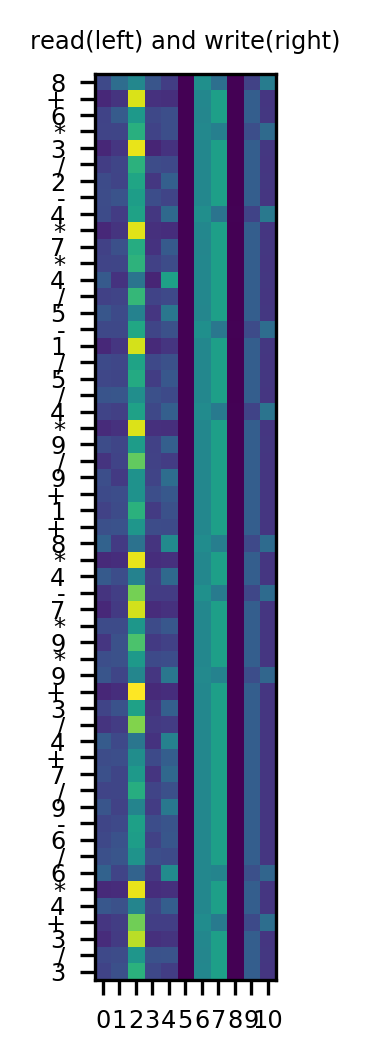

In [9]:
fig, ax = plt.subplots()
fig.dpi = 300
plt.title('read(left) and write(right)', fontsize='xx-small')
plt.imshow(ws)
plt.xticks(np.arange(0, 11), fontsize='xx-small')
plt.yticks(np.arange(seq_len), list(seq), fontsize='xx-small')
'a'

# the policy is not stable

In [11]:
wr = {i:[] for i in range(seq_len)}
ww = {i:[] for i in range(seq_len)}
es = []

i = 0
nc = 0
nt = 0
# with open('feval-analy_d23_ne10-ntm.txt', 'r') as f:
with open('feval-change_numerals-ntm-1544630154.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'w' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            e = line_json['expr']
            es.append(e)
            continue
        
        if line_json['type'] == 'read':
            wr[i].append(line_json['w'])
        if line_json['type'] == 'write':
            ww[i].append(line_json['w'])
        i += 1
        i %= seq_len

In [12]:
def draw_sample(idx, kept=27):
    
    
    wr_temp = {i:[] for i in range(seq_len)}
    ww_temp = {i:[] for i in range(seq_len)}

    for i in range(seq_len):
        wr_temp[i] = np.array(wr[i][idx:idx+1]).sum(0)/len(wr[i][idx:idx+1])
        ww_temp[i] = np.array(ww[i][idx:idx+1]).sum(0)/len(ww[i][idx:idx+1])
    wrs = np.array([wr_temp[i] for i in range(seq_len)])
    wws = np.array([ww_temp[i] for i in range(seq_len)])
    ws = np.hstack([wrs, np.zeros((seq_len, 1)), wws])
    fig, ax = plt.subplots()
    fig.dpi = 200
#     plt.title('read(top) and write(bottom)', fontsize=10)
    plt.imshow(ws.transpose()[:, :kept], cmap=plt.cm.Blues)
#     plt.grid(linestyle='dashed', linewidth=0.1)
    plt.yticks(np.arange(0, 11), [str(i) for i in range(5)] + [''] + [str(i) for i in range(5)], fontsize=10)
    plt.xticks(np.arange(0, seq_len)[:kept], list(es[idx])[:kept], fontsize=10)
    plt.ylabel('memory cell position')
    plt.xlabel('input symbol')
    plt.title('top read, bottom write')

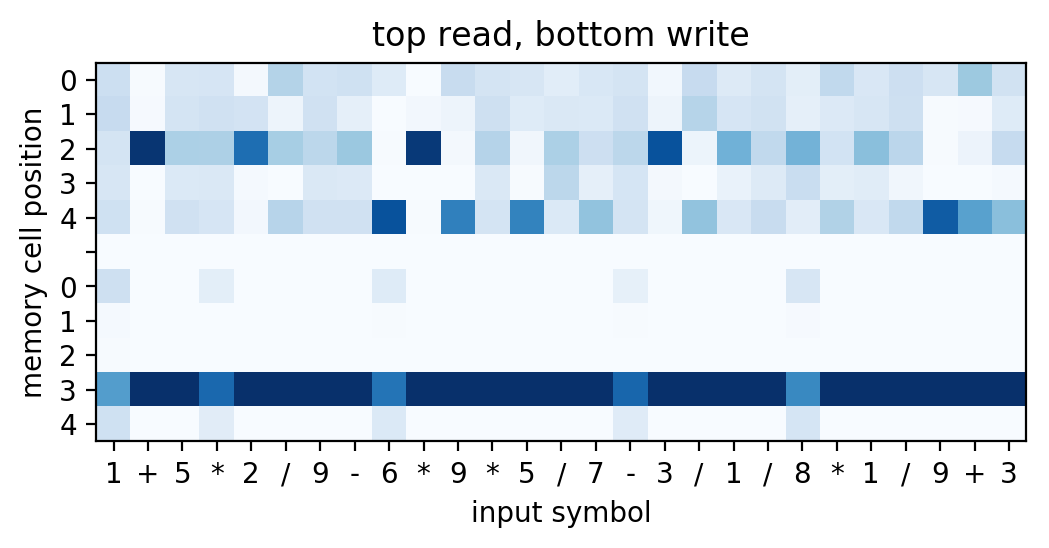

In [13]:
draw_sample(0)

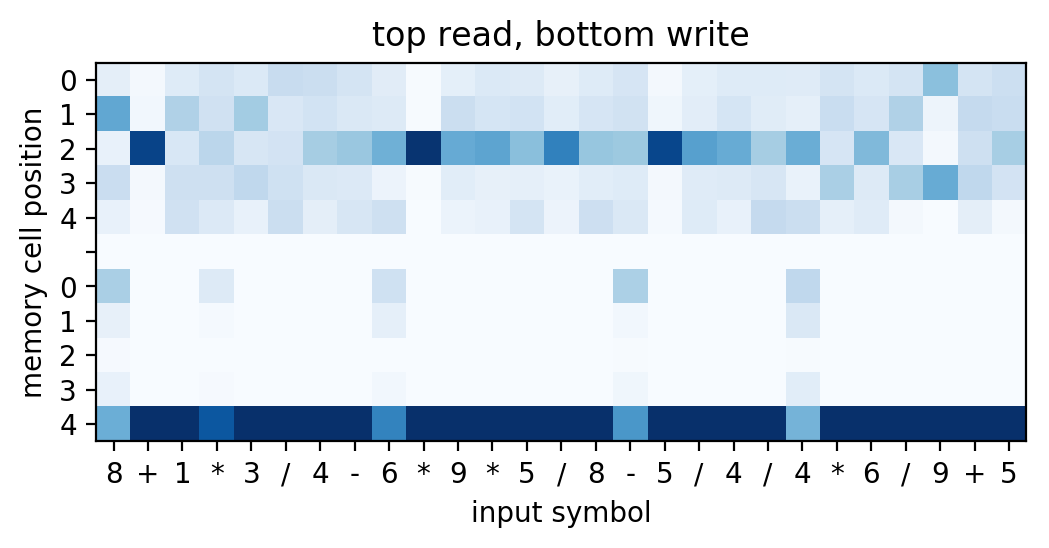

In [14]:
draw_sample(2)

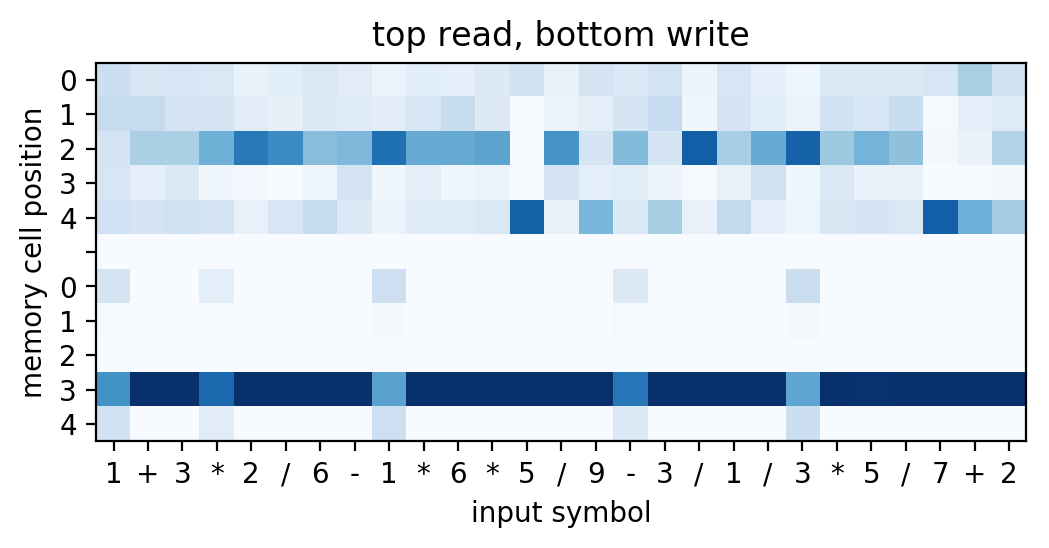

In [15]:
draw_sample(100)

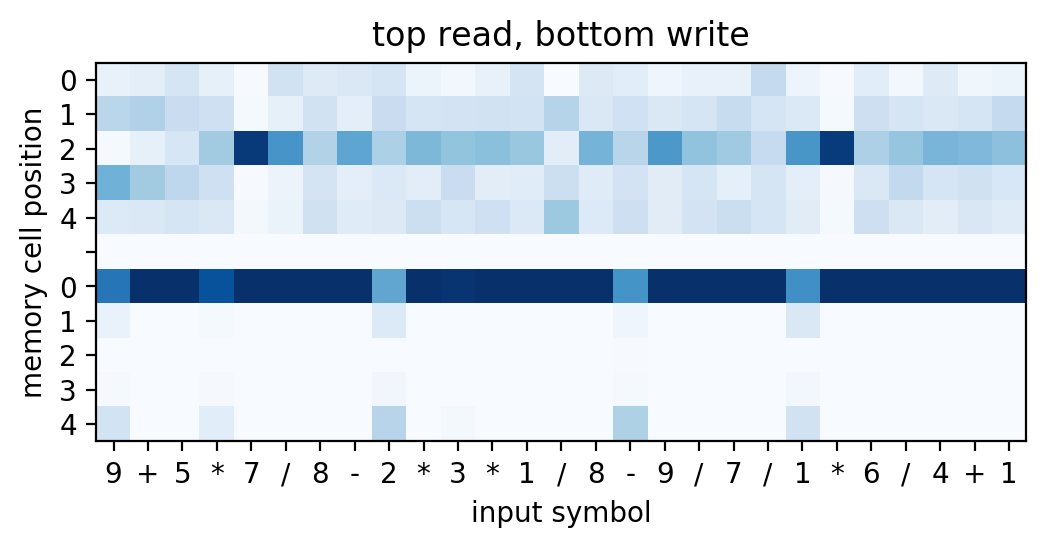

In [16]:
draw_sample(50)

# l/r : fraction of gates that are left/right saturated

In [11]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0
hdim = 100

In [12]:
i = 0
with open('feval-analy_d23_ne10-ntm_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [13]:
ngates = ngates/seq_len
ngates

50000.0

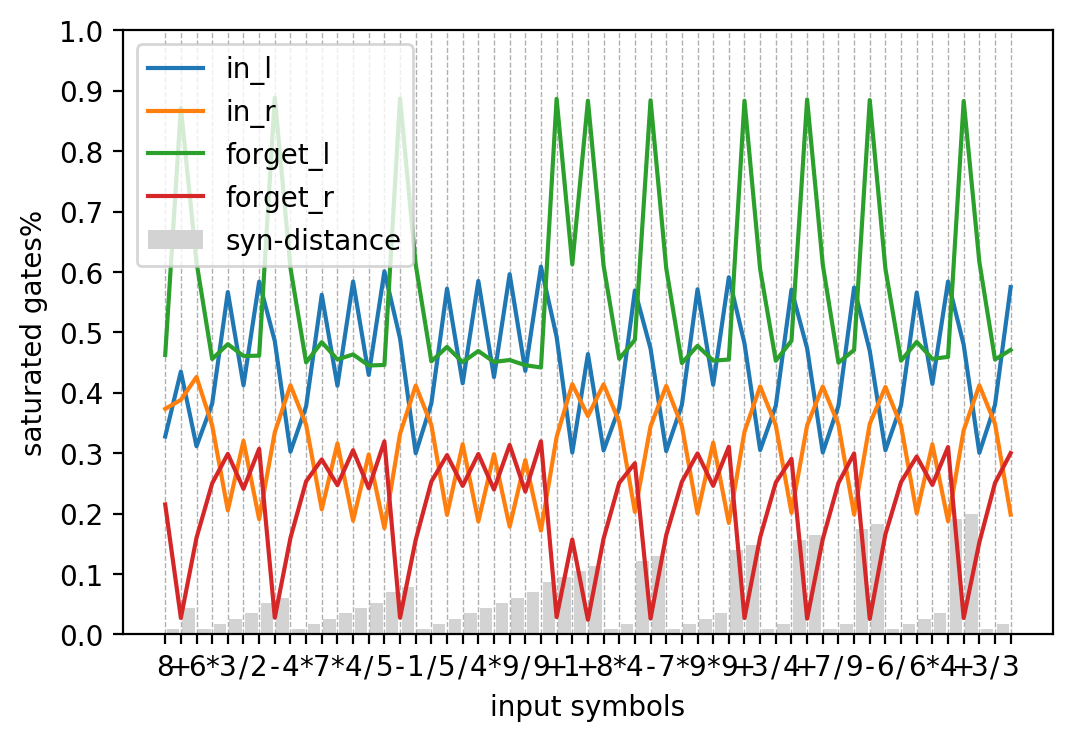

In [14]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis) * 0.2,
        label='syn-distance', color='lightgray')

plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

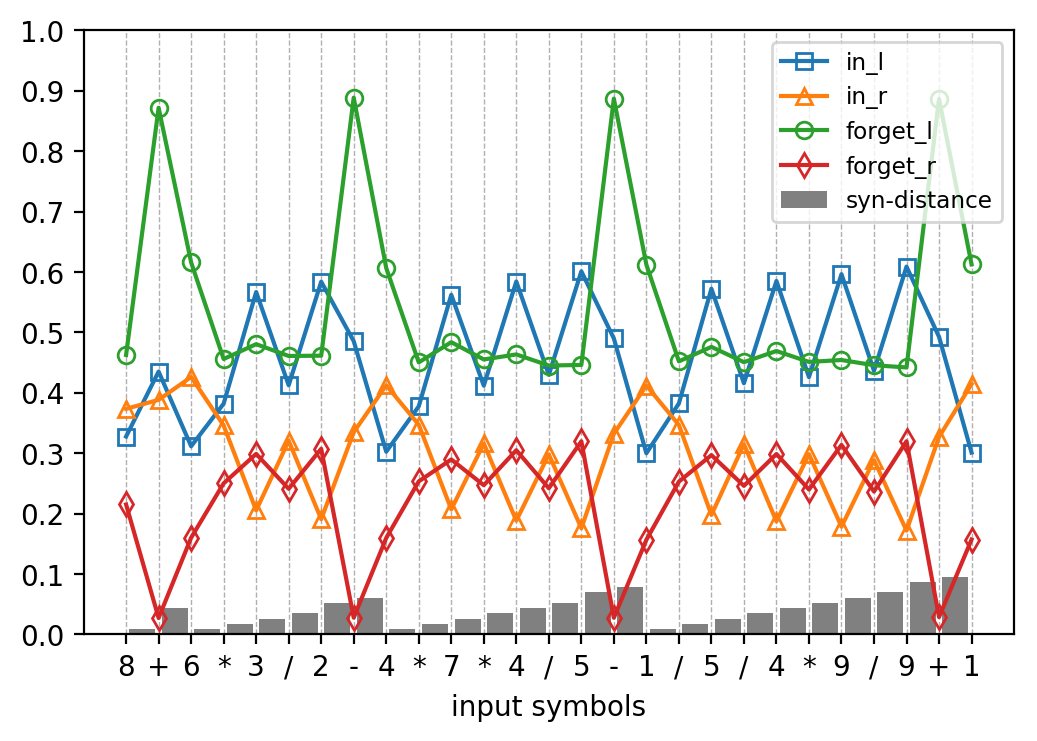

In [27]:
fig, ax = plt.subplots()
kept=seq_len//2
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_l[i] for i in in_l.keys()])/ngates)[:kept],
        label='in_l', marker='s', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_r[i] for i in in_r.keys()])/ngates)[:kept],
        label='in_r', marker='^', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_l[i] for i in forget_l.keys()])/ngates)[:kept],
        label='forget_l', marker='o', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_r[i] for i in forget_r.keys()])/ngates)[:kept],
        label='forget_r', marker='d', fillstyle='none')

plt.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis) * 0.2)[:kept-1],
        label='syn-distance', color='gray')

# plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend(fontsize='small')
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

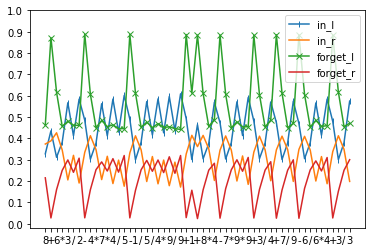

In [17]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

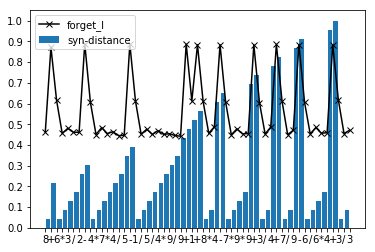

In [18]:
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x', color='black')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

# ne

In [96]:
wr = {i:[] for i in range(seq_len)}
ww = {i:[] for i in range(seq_len)}

i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-ntm-1543627872.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'w' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            continue
        
        wr[i].append(line_json['w'])
        ww[i].append(line_json['w'])
        i += 1
        i %= seq_len

In [97]:
print('correct prediction%:', nc/nt)
for i in range(seq_len):
    wr[i] = np.array(wr[i]).sum(0)/len(wr[i])
    ww[i] = np.array(ww[i]).sum(0)/len(ww[i])
wrs = np.array([wr[i] for i in range(seq_len)])
wws = np.array([ww[i] for i in range(seq_len)])
ws = np.hstack([wrs, np.zeros((seq_len, 1)), wws])

correct prediction%: 0.988


'a'

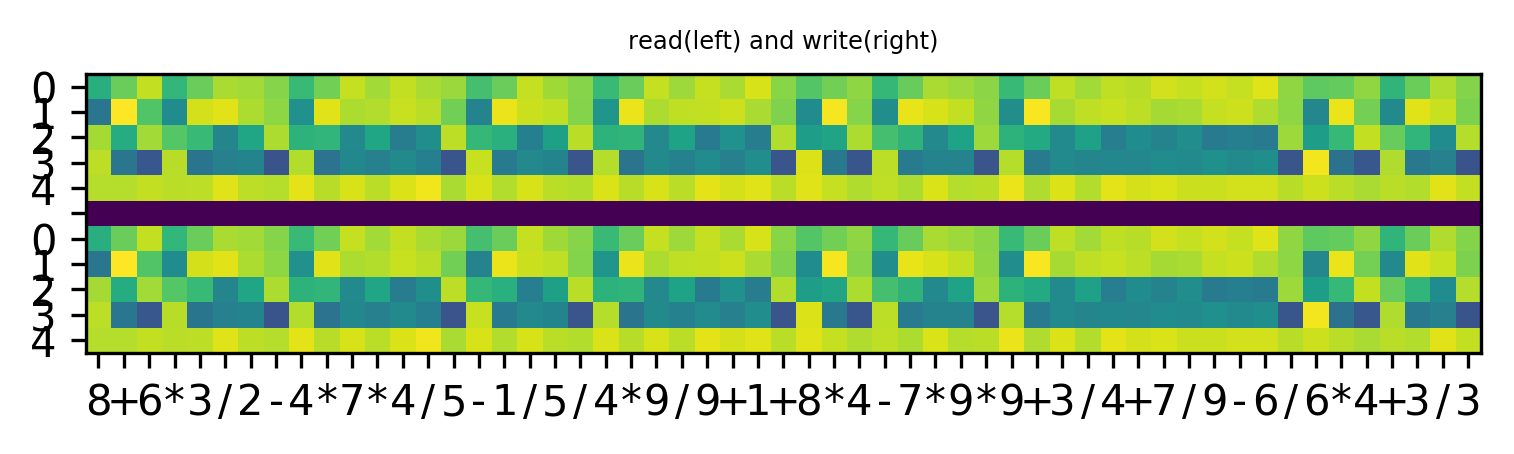

In [100]:
fig, ax = plt.subplots()
fig.dpi = 300
plt.title('read(left) and write(right)', fontsize='xx-small')
plt.imshow(ws.transpose())
plt.xticks(np.arange(0, seq_len), list(seq), fontsize=10)
plt.yticks(np.arange(0, 11), [str(i) for i in range(5)] + [''] + [str(i) for i in range(5)], fontsize=10)
'a'

In [104]:
wr = {i:[] for i in range(seq_len)}
ww = {i:[] for i in range(seq_len)}
es = []

i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-ntm-1543627872.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'w' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            e = line_json['expr']
            es.append(e)
            continue
        
        wr[i].append(line_json['w'])
        ww[i].append(line_json['w'])
        i += 1
        i %= seq_len

In [105]:
def draw_sample(idx, kept=27):
    
    wr_temp = {i:[] for i in range(seq_len)}
    ww_temp = {i:[] for i in range(seq_len)}

    for i in range(seq_len):
        wr_temp[i] = np.array(wr[i][idx:idx+1]).sum(0)/len(wr[i][idx:idx+1])
        ww_temp[i] = np.array(ww[i][idx:idx+1]).sum(0)/len(ww[i][idx:idx+1])
    wrs = np.array([wr_temp[i] for i in range(seq_len)])
    wws = np.array([ww_temp[i] for i in range(seq_len)])
    ws = np.hstack([wrs, np.zeros((seq_len, 1)), wws])
    fig, ax = plt.subplots()
    fig.dpi = 200
    plt.title('read(top) and write(bottom)', fontsize=10)
    plt.imshow(ws.transpose()[:, :kept], cmap=plt.cm.Blues)
#     plt.grid(linestyle='dashed', linewidth=0.1)
    plt.yticks(np.arange(0, 11), [str(i) for i in range(5)] + [''] + [str(i) for i in range(5)], fontsize=10)
#     plt.yticks(np.array(list(range(5)) + [-1] + list(range(5))), fontsize='xx-small')
    plt.xticks(np.arange(0, seq_len)[:kept], list(es[idx])[:kept], fontsize=10)
    plt.ylabel('memory cell position')
    plt.xlabel('input symbol')

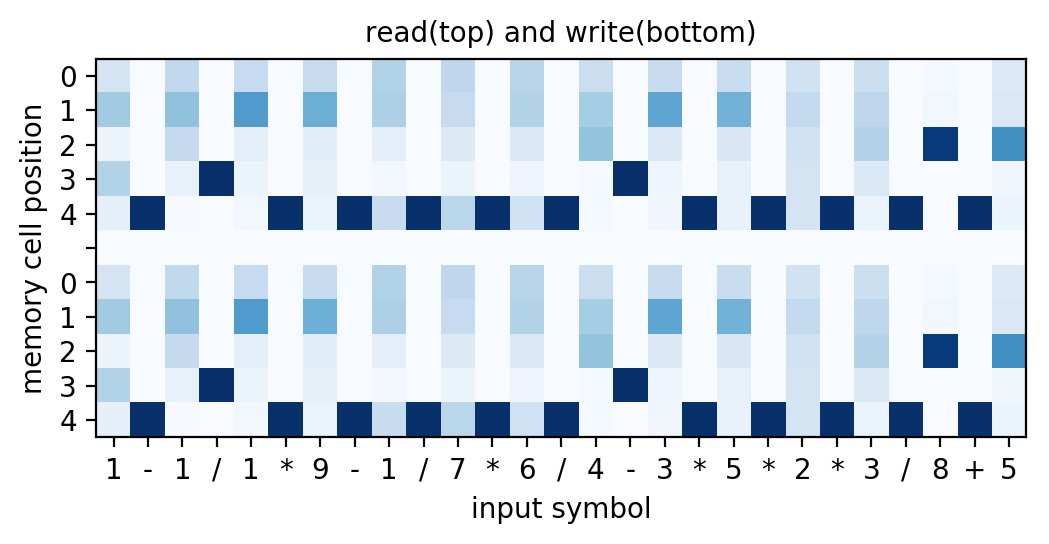

In [106]:
draw_sample(0)

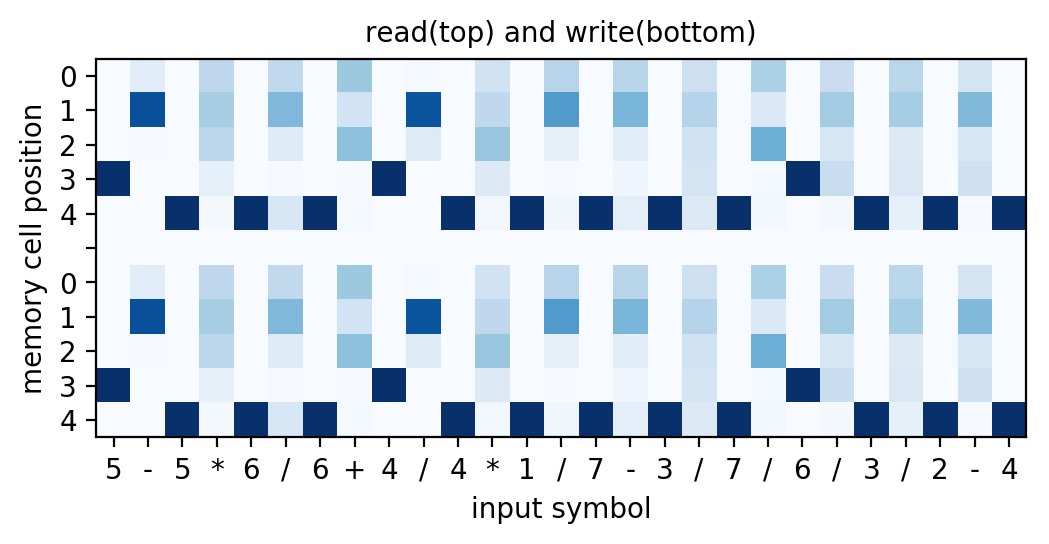

In [107]:
draw_sample(1)

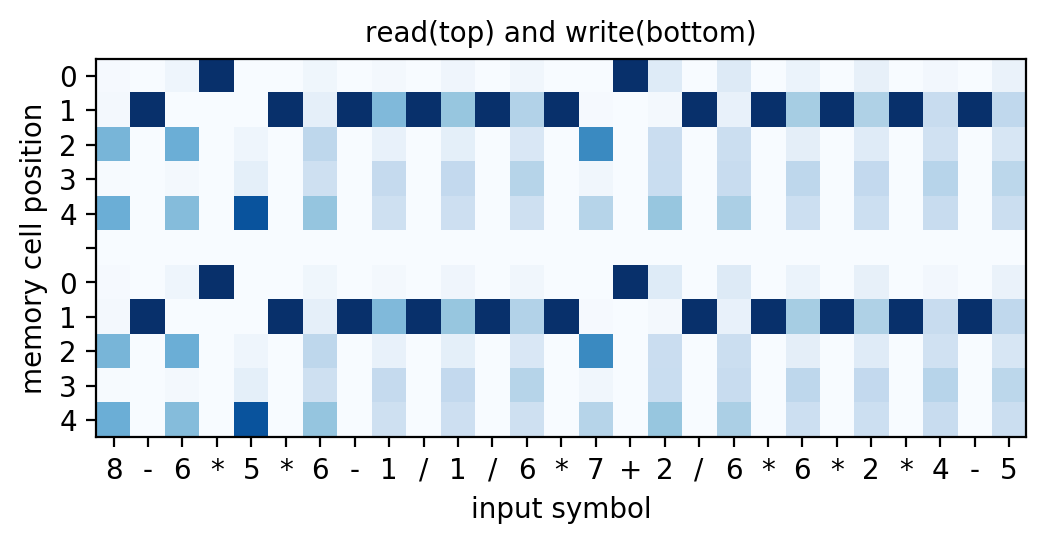

In [108]:
draw_sample(2)

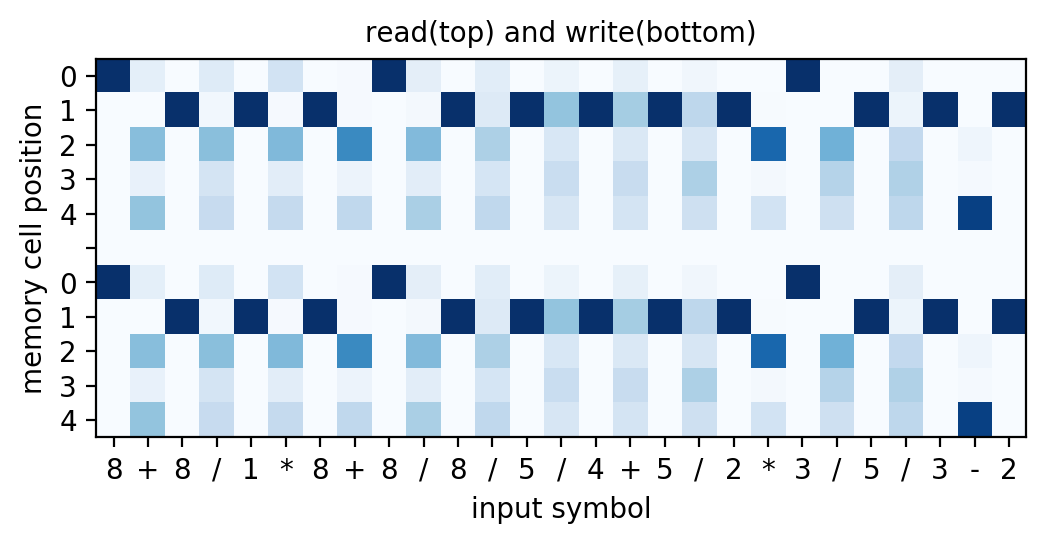

In [109]:
draw_sample(3)

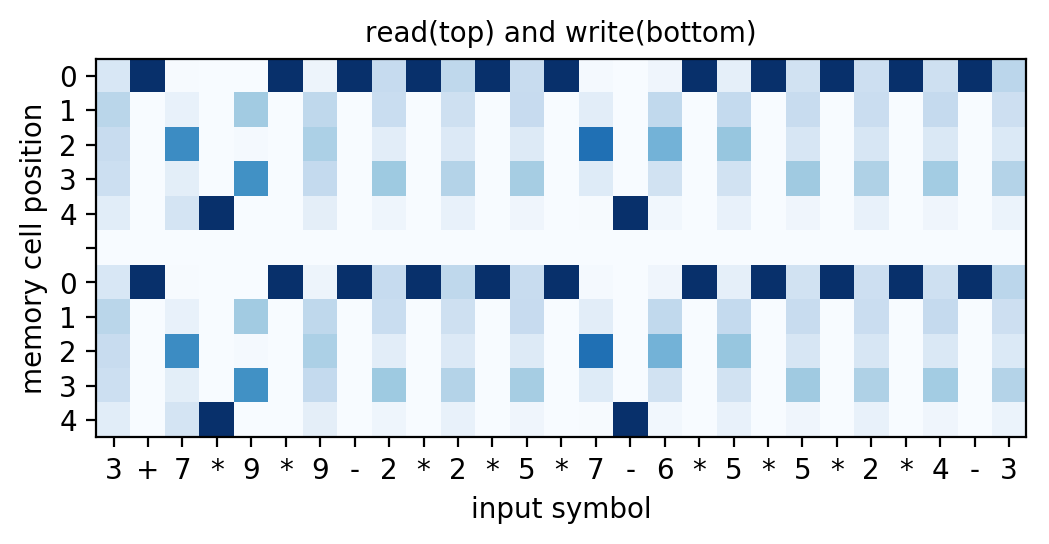

In [110]:
draw_sample(4)